In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Importing the dataset
dataset = pd.read_csv('Salary.csv')


In [3]:
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
#Seperate Input and Output
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [5]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [6]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [7]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [8]:
Out=pd.DataFrame({"Actual": y_test,"Predicted":y_pred})

In [9]:
Out

,Actual,Predicted
0,37731.0,40835.105909
1,122391.0,123079.399408
2,57081.0,65134.556261
3,63218.0,63265.367772
4,116969.0,115602.645454
5,109431.0,108125.891499
6,112635.0,116537.239698
7,55794.0,64199.962017
8,83088.0,76349.687193
9,101302.0,100649.137545


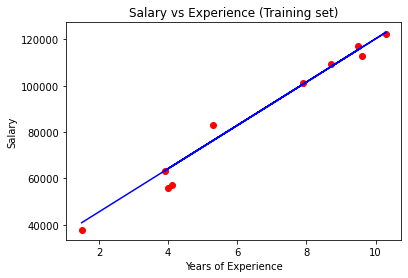

In [10]:
# Visualising the Test set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, y_pred, color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [11]:
print(regressor.coef_)
print(regressor.intercept_)

[9345.94244312]
26816.192244031176


In [12]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9749154407708353

In [13]:
#Stats Method

In [14]:
import statsmodels.api as sm

In [15]:
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)
model = sm.OLS(y_train, X_train).fit()

In [16]:
predictions = model.predict(X_test) 

In [17]:
Outs=pd.DataFrame({"Actual": y_test,"predictions":predictions})
Outs

,Actual,predictions
0,37731.0,40835.105909
1,122391.0,123079.399408
2,57081.0,65134.556261
3,63218.0,63265.367772
4,116969.0,115602.645454
5,109431.0,108125.891499
6,112635.0,116537.239698
7,55794.0,64199.962017
8,83088.0,76349.687193
9,101302.0,100649.137545


In [18]:
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     273.2
Date:                Fri, 19 Feb 2021   Prob (F-statistic):           2.51e-12
Time:                        20:19:55   Log-Likelihood:                -202.60
No. Observations:                  20   AIC:                             409.2
Df Residuals:                      18   BIC:                             411.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.682e+04   3033.148      8.841      0.0

In [19]:
model.params

array([26816.19224403,  9345.94244312])